In [1]:
from utils import *
import pandas as pd
import pickle
plt.rcParams.update({'font.size': 16})

In [2]:
# G1 = nx.erdos_renyi_graph(100, 0.2)
num_blocks = 5
con_mat2 = []
con_mat1 = []
for i in range(num_blocks):
    temp = [0.002 for j in range(num_blocks)]
    temp[i] = 0.1*(i)+0.1
#     temp[i] = 0.3
    con_mat2.append(temp)
    temp2 = [0.1 for j in range(num_blocks)]
    temp2[i] = 0.1*(num_blocks-i)+0.1
#     temp2[i] = 0.3
    con_mat1.append(temp2)
G1 = nx.stochastic_block_model([50 for i in range(num_blocks)],con_mat1)
G3 = nx.erdos_renyi_graph(50*num_blocks, 0.4)
G2 = nx.stochastic_block_model([50 for i in range(num_blocks)],con_mat2)

In [175]:
G1.number_of_edges(), G1.number_of_nodes()

(4989, 250)

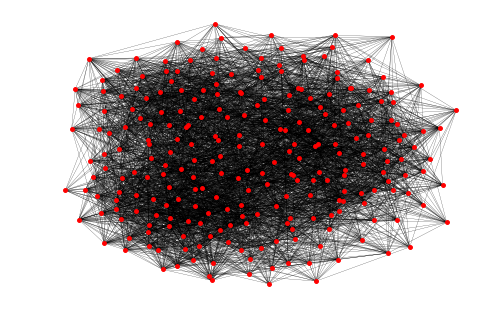

In [7]:
nx.draw(G1, node_size=15, width=0.2)

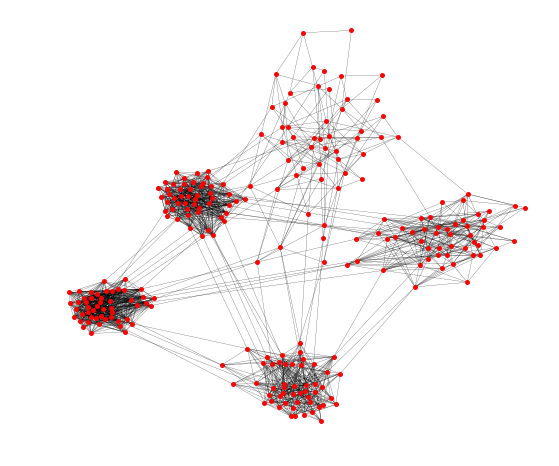

In [8]:
plt.figure(figsize=(7,6))
nx.draw(G2, node_size=15, width=0.2)
# plt.savefig('syn_bff.png')

## Dual-DC results

In [146]:
common = (set(G1.nodes()) & set(G2.nodes()))
Ss = []
for k in range(1,25):
    S, mindeg = k_conn_min_deg(G2.subgraph(common), G1.subgraph(common), k, verbose=False)
    print 'size of dense-connected subgraph', len(S)

    Ss.append(S)

size of dense-connected subgraph 237
size of dense-connected subgraph 237
size of dense-connected subgraph 233
size of dense-connected subgraph 224
size of dense-connected subgraph 184
size of dense-connected subgraph 183
size of dense-connected subgraph 190
size of dense-connected subgraph 47
size of dense-connected subgraph 44
size of dense-connected subgraph 43
size of dense-connected subgraph 44
size of dense-connected subgraph 47
size of dense-connected subgraph 44
size of dense-connected subgraph 49
size of dense-connected subgraph 48
size of dense-connected subgraph 47
size of dense-connected subgraph 47
size of dense-connected subgraph 46
size of dense-connected subgraph 42
size of dense-connected subgraph 0
size of dense-connected subgraph 0
size of dense-connected subgraph 0
size of dense-connected subgraph 0
size of dense-connected subgraph 0


## k-CCO results

In [6]:
for i in [2,10, 15, 20, 25]:
    res = kcco(G2, G1, i)
    h = G2.subgraph(res[0])
#     print(res)
    k = 0
    while is_k_connected(h, k):
        k += 1
    print(h.number_of_nodes(), h.number_of_edges(), k-1)

(250, 1889, 2)
(250, 1889, 2)
(250, 1889, 2)
(249, 1866, 2)
(233, 1534, 2)


## Read results from BFF 

In [150]:
f = open('synthetic_BFF','w')

for e in G1.edges():
    f.write(str(e[0])+'\t'+str(e[1])+'\t'+'1\n')
    
for e in G2.edges():
    f.write(str(e[0])+'\t'+str(e[1])+'\t'+'2\n')

f.close()

In [151]:
for i in range(1,9):
    sub = readresult('../compare_alg/BestFriendsForever-BFF--master/out/synthetic_BFF_'+str(i)+'.txt')
    if len(sub)==0:
        print('pass', i)
        continue
    print 'm=', i , len(sub)
    plot_S(dict(), sub, G1, G2, 'BFF_twitter/'+str(i), plot=False)
    plot_S(dict(), sub, G2, G1, 'BFF_twitter/'+str(i), plot=False)

m= 1 144
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(11, 18.73611111111111, 29, 3550, 6)
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(11, 18.97222222222222, 32, 1228, 11)
m= 2 149
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(3, 19.08724832214765, 30, 3790, 3)
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(8, 19.08724832214765, 33, 1276, 8)
m= 3 131
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(9, 18.106870229007633, 29, 3219, 6)
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(11, 17.87786259541985, 30, 1008, 11)
m= 4 250
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(1, 14.648, 30, 3972, 1)
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(16, 32.488, 50, 6402, 16)
m= 5 219
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(1, 11.680365296803654, 21, 1682, 1)
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(17, 30.374429223744293, 46, 5242, 17)
m= 6 

## plot

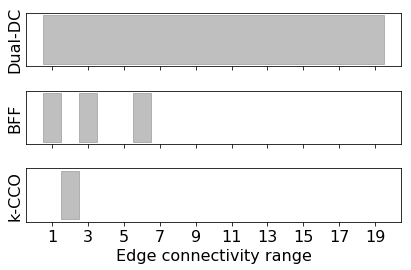

In [184]:
# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
fig, ax = plt.subplots(3 ,figsize=(6, 4), sharex=True)
plt.subplots_adjust(hspace=0.2)

metriks = ["Dual-DC", "BFF", "k-CCO"]
colors = ['#66c2a5', '#fc8d62', '#8da0cb'] #Set2 palette hexes

for i, metric in enumerate(metriks):
    
#     df[[metric]].plot(ax=ax[i], color=colors[i], legend=None)
    ax[i].set_ylabel(metric)
    ax[i].set_yticks([], [])

ax[0].fill_betweenx(y=[-3, 3], x1=0.5,
                    x2=19.5, color='gray', alpha=0.5)
ax[1].fill_betweenx(y=[-3, 3], x1=0.5,
                        x2=1.5, color='gray', alpha=0.5)
ax[1].fill_betweenx(y=[-3, 3], x1=2.5,
                        x2=3.5, color='gray', alpha=0.5)
ax[1].fill_betweenx(y=[-3, 3], x1=5.5,
                        x2=6.5, color='gray', alpha=0.5)
ax[2].fill_betweenx(y=[-3, 3], x1=1.5,
                        x2=2.5, color='gray', alpha=0.5)
ax[2].set_xticks([i for i in range(1,21,2)])
ax[2].set_xticklabels([str(i) for i in range(1,21,2)])
plt.xlabel('Edge connectivity range')
plt.tight_layout()
plt.savefig('syn_compare.png')
plt.show()

# Plot for twitter networks (same format)

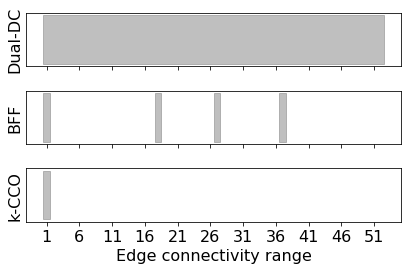

In [185]:
fig, ax = plt.subplots(3 ,figsize=(6, 4), sharex=True)
plt.subplots_adjust(hspace=0.2)

metriks = ["Dual-DC", "BFF", "k-CCO"]
colors = ['#66c2a5', '#fc8d62', '#8da0cb'] #Set2 palette hexes

for i, metric in enumerate(metriks):
    
#     df[[metric]].plot(ax=ax[i], color=colors[i], legend=None)
    ax[i].set_ylabel(metric)
    ax[i].set_yticks([], [])

ax[0].fill_betweenx(y=[-3, 3], x1=0.5,
                    x2=52.5, color='gray', alpha=0.5)
ax[1].fill_betweenx(y=[-3, 3], x1=0.5,
                        x2=1.5, color='gray', alpha=0.5)
ax[1].fill_betweenx(y=[-3, 3], x1=17.5,
                        x2=18.5, color='gray', alpha=0.5)
ax[1].fill_betweenx(y=[-3, 3], x1=26.5,
                        x2=27.5, color='gray', alpha=0.5)
ax[1].fill_betweenx(y=[-3, 3], x1=36.5,
                        x2=37.5, color='gray', alpha=0.5)
ax[2].fill_betweenx(y=[-3, 3], x1=0.5,
                        x2=1.5, color='gray', alpha=0.5)
ax[2].set_xticks([i for i in range(1,53,5)])
ax[2].set_xticklabels([str(i) for i in range(1,53,5)])
plt.xlabel('Edge connectivity range')
plt.tight_layout()
plt.savefig('twitter_compare.png')
plt.show()